<a href="https://colab.research.google.com/github/SidharthBaral/CapstoneProject-1/blob/main/Capstone_Project1_EDA_on_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Description:**

This data set contains booking information for a city hotel and a resort, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. We need to explore and analyse the data to discover important factors that govern the bookings.


We start the Exploratory Data Analysis process by importing the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Importing Hotel Booking.csv file from google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_id = '1NiHZq_hejXyuLQHUmAr63olF0DPEYN-n'
filepath='https://drive.google.com/uc?id={}'.format(file_id)
df=pd.read_csv(filepath)

*df is a Pandas dataframe object that contains the 'Hotel_Bookings.csv' dataset.*

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


*Let's look at the shape of the data set.*

In [ ]:
df.shape

(119390, 32)

*List of columns*

In [ ]:
col_list = list(df.columns)
col_list

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

*Let's check if any null values exists in the given data set*

In [ ]:
print(df.isnull().sum().sum())

129425


In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
data = df.copy() # Creating a copy of original data set so that we don't need to create connection with local drive to fetch the original data incase we drop some data while data manupulation.

##**Dataset Cleaning** 🧹

**Handling Missing Values**

---



In [ ]:
data.replace(['?','/','//','$',';',':','_','__','*'], np.nan, inplace=True) # Searching and replacing special characters in the entire dataset with null values

Therefore we find that non of the fields of the dataframe contains any special characters.

In [ ]:
print(data['children'].describe())
print('Total number of null values in children column: ',data['children'].isnull().sum())
print(data['children'].value_counts(normalize = True)*100)
print('***'*30)
print(data['babies'].describe())
print(data['babies'].value_counts(normalize = True)*100)

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64
Total number of null values in children column:  4
0.0     92.804851
1.0      4.071667
2.0      3.058985
3.0      0.063659
10.0     0.000838
Name: children, dtype: float64
******************************************************************************************
count    119390.000000
mean          0.007949
std           0.097436
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: babies, dtype: float64
0     99.231929
1      0.753832
2      0.012564
10     0.000838
9      0.000838
Name: babies, dtype: float64


 From above set of code we can see that mostly children and babies do not visit neither Hotels or Resorts. Also the number of null values for number of children is significantly very less as compared to filled values. Moreover, majority of fields for children have values equal to "0" as compared to any other value hence null values can be filled with "0".

In [ ]:
data['children'].fillna(data['children'].min(),inplace = True)

*Changing the data type of columns*

In [ ]:
data['children'] = data['children'].astype('int')
data['arrival_date_month'] = data['arrival_date_month'].replace({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

Creating 'Kids' as a new feature which is a summation of 'children' and 'babies'

***Creating additional features ***

In [ ]:
data['kids'] = data['children']+data['babies']
data['guest'] = np.where((data.distribution_channel=='Corporate')&((data.adults>0) & (data.kids>=0)),'Corporate',
                         np.where((data.distribution_channel!='Corporate')&((data.adults>0) & (data.kids>0)),'Family',
                                  np.where((data.distribution_channel!='Corporate')&((data.adults>0) & (data.kids==0)),'Others','Single')))
print(data.guest.value_counts(),data.shape)
print('**'*30)

# Creating 'arrival_date' and 'actual_booking_date' columns using 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month' columns
data['arrival_date']=data["arrival_date_year"].astype('str') + "/" + data["arrival_date_month"].astype('str') + "/" + data["arrival_date_day_of_month"].astype('str')
data['arrival_date'] = pd.to_datetime(data['arrival_date'])
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
# data['actual_booking_date'] = data['arrival_date'] - pd.to_timedelta(data['lead_time'], unit='d')

# data[['actual_booking_date','arrival_date']].head()

Others       103284
Family         9052
Corporate      6651
Single          403
Name: guest, dtype: int64 (119390, 34)
************************************************************


In [ ]:
data['guest']

0            Others
1            Others
2            Others
3         Corporate
4            Others
            ...    
119385       Others
119386       Others
119387       Others
119388       Others
119389       Others
Name: guest, Length: 119390, dtype: object

**adr: It is the measure of the average paid for rooms sold in a given time period.**

**Renaming adr as Average_daily_rate**

In [ ]:
data.rename(columns ={'adr' : 'Average_daily_rate'},inplace =True)


Droping unnecessary columns


In [ ]:
# drop rows with missing values in the price column
data.drop(columns=['children','babies','country','agent','company','market_segment', 'arrival_date_day_of_month','arrival_date_week_number'], axis=1, inplace=True)


In [ ]:
data.isnull().sum().sum() # No more null values present in the data set

0

In [ ]:
data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
meal                                      object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
days_in_waiting_list                       int64
customer_type                             object
Average_daily_rate                       float64
required_car_parking

**REMOVING DUPLICATES**

---

The process of identifying and removing or handling instances where the same observation appears multiple times in a dataset. Duplicates can occur due to errors in data collection, data entry, or data merging, and can lead to biased or incorrect analyses if not properly addressed.

In [ ]:
# Check for duplicates
print('Duplicate Entries in the data set: ',data.duplicated().sum())
duplicate_data = data[data.duplicated()]
duplicate_data

Duplicate Entries in the data set:  33805


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,distribution_channel,...,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,guest,arrival_date
5,Resort Hotel,0,14,2015,7,0,2,2,BB,TA/TO,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,Others,2015-07-01
15,Resort Hotel,0,68,2015,7,0,4,2,BB,TA/TO,...,0,Transient,97.00,0,3,Check-Out,2015-07-05,0,Others,2015-07-01
22,Resort Hotel,0,72,2015,7,2,4,2,BB,Direct,...,0,Transient,84.67,0,1,Check-Out,2015-07-07,0,Others,2015-07-01
43,Resort Hotel,0,70,2015,7,2,3,2,HB,Direct,...,0,Transient,137.00,0,1,Check-Out,2015-07-07,0,Others,2015-07-02
117,Resort Hotel,0,92,2015,7,4,6,2,BB,TA/TO,...,0,Contract,71.55,0,1,Check-Out,2015-07-14,0,Others,2015-07-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,8,0,3,2,BB,TA/TO,...,0,Transient,126.00,0,2,Check-Out,2017-09-03,0,Others,2017-08-31
119352,City Hotel,0,63,2017,8,0,3,3,BB,TA/TO,...,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,0,Others,2017-08-31
119353,City Hotel,0,63,2017,8,0,3,3,BB,TA/TO,...,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,0,Others,2017-08-31
119354,City Hotel,0,63,2017,8,0,3,3,BB,TA/TO,...,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,0,Others,2017-08-31


Keeping the first entry and droping all its duplicate entries..

In [ ]:
data.drop_duplicates(keep = 'first',inplace=True)

In [ ]:
data.shape

(85585, 27)

#**Data Preparation**

In [ ]:
data['is_canceled'].value_counts(normalize = True)*100

0    71.957703
1    28.042297
Name: is_canceled, dtype: float64

In [ ]:
data['reservation_status'].value_counts(normalize = True)*100

Check-Out    71.957703
Canceled     26.857510
No-Show       1.184787
Name: reservation_status, dtype: float64

In [ ]:
data[data['reservation_status'] =='No-Show']['hotel'].value_counts(normalize = True)*100

City Hotel      73.767258
Resort Hotel    26.232742
Name: hotel, dtype: float64

In [ ]:
data[(data['reservation_status'] =='No-Show') & (data['is_canceled']==1)]['hotel'].value_counts(normalize =True)*100

City Hotel      73.767258
Resort Hotel    26.232742
Name: hotel, dtype: float64

In [ ]:
data[(data['reservation_status'] =='No-Show') & (data['is_canceled']==0)]['hotel'].value_counts()# There are no such rooms booked which have reservation_status 'No-show'

Series([], Name: hotel, dtype: int64)

In [ ]:
data['stay_duration'] = data['reservation_status_date'] - data['arrival_date']
data['stay_duration'] =data['stay_duration'].dt.days

data['total_stay'] = data['stays_in_weekend_nights']+data['stays_in_week_nights']
data[['total_stay','stay_duration']].head(5)

,total_stay,stay_duration
0,0,0
1,0,0
2,1,1
3,1,1
4,2,2


In [ ]:
data['deposit_type'].value_counts(normalize=True)*100

No Deposit    98.686686
Non Refund     1.206987
Refundable     0.106327
Name: deposit_type, dtype: float64

In [ ]:
# Droping date columns and few undesired columns
data.drop(columns=['is_canceled','deposit_type'],axis = 1, inplace=True)

In [ ]:
data.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,distribution_channel,is_repeated_guest,...,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,guest,arrival_date,stay_duration,total_stay
0,Resort Hotel,342,2015,7,0,0,2,BB,Direct,0,...,0.0,0,0,Check-Out,2015-07-01,0,Others,2015-07-01,0,0
1,Resort Hotel,737,2015,7,0,0,2,BB,Direct,0,...,0.0,0,0,Check-Out,2015-07-01,0,Others,2015-07-01,0,0
2,Resort Hotel,7,2015,7,0,1,1,BB,Direct,0,...,75.0,0,0,Check-Out,2015-07-02,0,Others,2015-07-01,1,1
3,Resort Hotel,13,2015,7,0,1,1,BB,Corporate,0,...,75.0,0,0,Check-Out,2015-07-02,0,Corporate,2015-07-01,1,1
4,Resort Hotel,14,2015,7,0,2,2,BB,TA/TO,0,...,98.0,0,1,Check-Out,2015-07-03,0,Others,2015-07-01,2,2


In [ ]:
temp = data.loc[data.total_stay !=data.stay_duration]
print(temp.shape)
temp2 = data.loc[data.total_stay ==data.stay_duration]
print(temp2.shape)
temp

(23995, 27)
(61590, 27)


,hotel,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,distribution_channel,is_repeated_guest,...,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,guest,arrival_date,stay_duration,total_stay
8,Resort Hotel,85,2015,7,0,3,2,BB,TA/TO,0,...,82.00,0,1,Canceled,2015-05-06,0,Others,2015-07-01,-56,3
9,Resort Hotel,75,2015,7,0,3,2,HB,TA/TO,0,...,105.50,0,0,Canceled,2015-04-22,0,Others,2015-07-01,-70,3
10,Resort Hotel,23,2015,7,0,4,2,BB,TA/TO,0,...,123.00,0,0,Canceled,2015-06-23,0,Others,2015-07-01,-8,4
24,Resort Hotel,127,2015,7,2,5,2,HB,TA/TO,0,...,94.95,0,1,Check-Out,2015-07-01,0,Others,2015-07-01,0,7
27,Resort Hotel,60,2015,7,2,5,2,BB,TA/TO,0,...,107.00,0,2,Canceled,2015-05-11,0,Others,2015-07-01,-51,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111924,City Hotel,7,2017,5,0,1,1,BB,Corporate,1,...,65.00,0,0,Canceled,2017-05-31,0,Corporate,2017-05-31,0,1
111925,City Hotel,6,2017,7,1,0,1,BB,Corporate,1,...,65.00,0,0,No-Show,2017-07-17,0,Corporate,2017-07-17,0,1
113521,City Hotel,40,2017,6,0,1,2,BB,TA/TO,0,...,140.00,0,2,Check-Out,2017-06-08,0,Others,2017-06-08,0,1
114002,City Hotel,40,2017,6,0,1,2,BB,TA/TO,0,...,230.00,0,0,Check-Out,2017-06-15,2,Family,2017-06-15,0,1


In [ ]:
temp.reservation_status.value_counts()

Canceled     22970
No-Show       1001
Check-Out       24
Name: reservation_status, dtype: int64

In [ ]:
temp['is_repeated_guest'].value_counts()

0    23736
1      259
Name: is_repeated_guest, dtype: int64

In [ ]:
temp.groupby('reservation_status')['customer_type'].value_counts()

reservation_status  customer_type  
Canceled            Transient          20771
                    Transient-Party     1663
                    Contract             487
                    Group                 49
Check-Out           Transient             16
                    Transient-Party        6
                    Contract               2
No-Show             Transient            852
                    Transient-Party      120
                    Contract              25
                    Group                  4
Name: customer_type, dtype: int64

In [ ]:
# temp[['reservation_status_date','arrival_date',	'actual_booking_date'	,'stay_duration','total_stay','days_in_waiting_list']]
temp['total_of_special_requests'].value_counts()

0    14550
1     6496
2     2517
3      396
4       34
5        2
Name: total_of_special_requests, dtype: int64

In [ ]:
temp2.reservation_status.value_counts()

Check-Out    61561
Canceled        16
No-Show         13
Name: reservation_status, dtype: int64

In [ ]:
temp2['is_repeated_guest'].value_counts()

0    58440
1     3150
Name: is_repeated_guest, dtype: int64

In [ ]:
temp2['total_of_special_requests'].value_counts()

0    28151
1    22071
2     9153
3     1897
4      284
5       34
Name: total_of_special_requests, dtype: int64

In [ ]:
# data.drop(columns=['arrival_date','reservation_status_date'],axis=1,inplace = True)
data.shape

(85585, 27)

**OUTLIERS:**

---

Finding outliers in the data. 📈📉

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85585 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           85585 non-null  object        
 1   lead_time                       85585 non-null  int64         
 2   arrival_date_year               85585 non-null  int64         
 3   arrival_date_month              85585 non-null  int64         
 4   stays_in_weekend_nights         85585 non-null  int64         
 5   stays_in_week_nights            85585 non-null  int64         
 6   adults                          85585 non-null  int64         
 7   meal                            85585 non-null  object        
 8   distribution_channel            85585 non-null  object        
 9   is_repeated_guest               85585 non-null  int64         
 10  previous_cancellations          85585 non-null  int64         
 11  p

In [ ]:
## Finding Categorical columns from the data
from pandas.api.types import is_int64_dtype
categorical = [i for i in data.columns if data[i].dtypes=='O']
print('Total Categorical columns: ',len(categorical))
print(categorical)
print('**'*30)
numeric = [i for i in data.columns if data[i].dtypes!='O']
print('Total Numerical columns: ',len(numeric))
print(numeric)
print('**'*30)
# discrete = [i for i in data.columns if data[i].dtypes ==np.int64]
# print('Total Discrete collumns: ',len(discrete))
# print(discrete)
# print('**'*30)
# continious = set(numeric)-set(discrete)
# print('Total continious collumns: ',len(continious))
# print(continious)

Total Categorical columns:  8
['hotel', 'meal', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status', 'guest']
************************************************************
Total Numerical columns:  19
['lead_time', 'arrival_date_year', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'Average_daily_rate', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'kids', 'arrival_date', 'stay_duration', 'total_stay']
************************************************************


<ipython-input-174-c6dd2122a59b>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(data[i], fit=norm)


______________________________________________________________________________


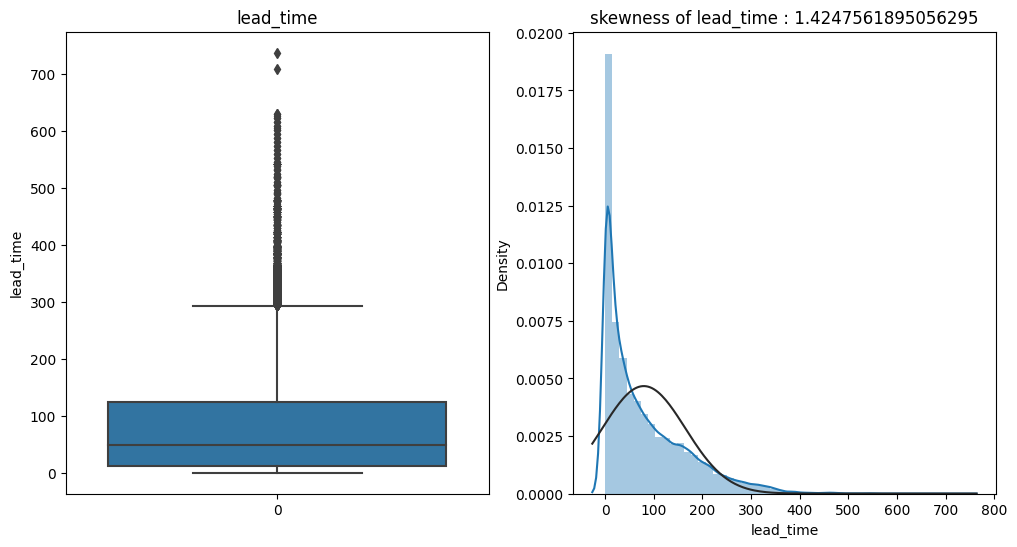

<ipython-input-174-c6dd2122a59b>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(data[i], fit=norm)


______________________________________________________________________________


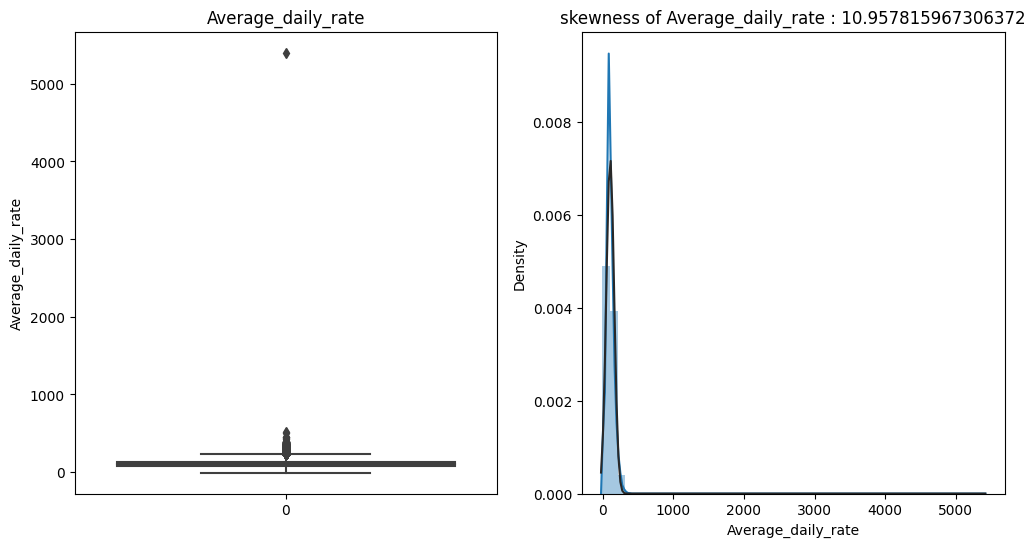

In [ ]:
# Create a box plot of the price feature
numeric_col = ['lead_time','Average_daily_rate']
# sns.boxplot(x="Average_daily_rate", data=data)
# sns.boxplot(x="lead_time", data=data)

# # Display the plot
# plt.show()

from scipy.stats import norm
for i in numeric_col:
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data=data[i])
  ax.set_title(f'{i}')
  ax.set_ylabel(i)

  plt.subplot(1,2,2)
  ax=sns.distplot(data[i], fit=norm)
  ax.set_title(f'skewness of {i} : {data[i].skew()}')
  ax.set_xlabel(i)
  print('__'*39)
  plt.show()

###**Strategies to Deal With Outliers**

In [ ]:
# new_df = data.loc[(data.Average_daily_rate<500) & (data.lead_time<=300)]
# new_df = data.copy()
lst = []
for i in numeric_col:

  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1 - (1.5*IQR)
  upper_limit = Q3 + (1.5*IQR)
  lst.append([lower_limit,upper_limit])
print(lst)
data1 = data[((data.lead_time>lst[0][0]) & (data.lead_time<lst[0][1])) & ((data.Average_daily_rate>lst[1][0]) & (data.Average_daily_rate<lst[1][1]))]
data1.shape

[[-158.5, 293.5], [-22.10000000000001, 229.26]]


(80851, 27)

In [ ]:
data1 =data[(data.Average_daily_rate<250) & (data.lead_time<250)]
data1.shape

(79776, 27)

In [ ]:
data1[numeric_col]

,lead_time,Average_daily_rate
2,7,75.00
3,13,75.00
4,14,98.00
6,0,107.00
7,9,103.00
...,...,...
119385,23,96.14
119386,102,225.43
119387,34,157.71
119388,109,104.40


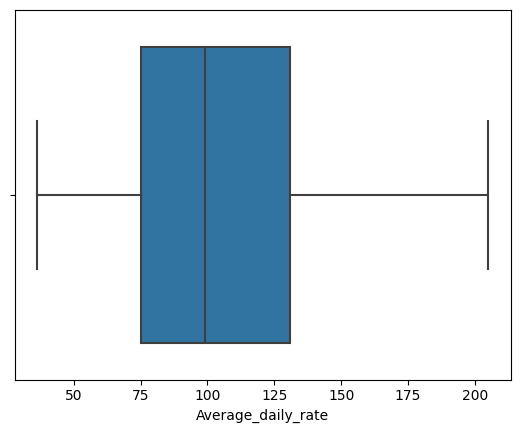

In [ ]:
# from scipy.stats import norm
# for i in numeric_col:
#   plt.figure(figsize=(15,6))
#   plt.subplot(1,2,1)
#   ax=sns.boxplot(data=data1[i])
#   ax.set_title(f'{i}')
#   ax.set_ylabel(i)

#   plt.subplot(1,2,2)
#   ax=sns.distplot(data1[i], fit=norm)
#   ax.set_title(f'skewness of {i} : {data1[i].skew()}')
#   ax.set_xlabel(i)
#   print('__'*50)
#   plt.show()
# ['lead_time','Average_daily_rate']
sns.boxplot(x="Average_daily_rate", data=data1)

# Display the plot
plt.show()


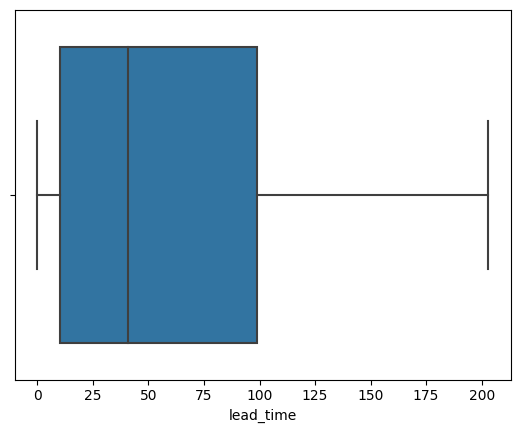

In [ ]:
sns.boxplot(x="lead_time", data=data1)

# Display the plot
plt.show()

**Let's deal with these outliers using IQR Method**

In [ ]:
# Dealing with outliers
# data1 = data1[(data1['price'] >= data1['price'].quantile(0.05)) &
#         (data1['price'] <= data1['price'].quantile(0.95))]
data1 = data[((data.Average_daily_rate<=data['Average_daily_rate'].quantile(0.95)) & (data.Average_daily_rate>=data['Average_daily_rate'].quantile(0.05)))
 & ((data.lead_time<=data1['lead_time'].quantile(0.95))& (data.lead_time>=data1['lead_time'].quantile(0.05)))]
data1.shape

(65592, 27)